> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [29]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [30]:
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [31]:
df.shape

(110527, 14)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [33]:
df['No-show'] = df['No-show'].astype('|S80')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [35]:
print(df.duplicated().sum())

0


In [36]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

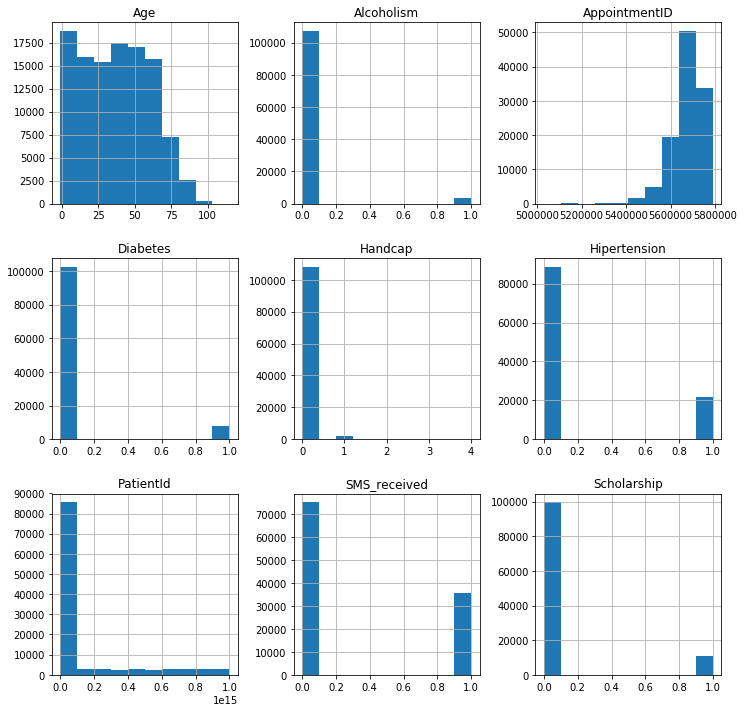

In [37]:
df.hist(figsize=(12,12));

In [38]:
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [39]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [41]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null bool
AppointmentID     110527 non-null bool
Gender            110527 non-null bool
ScheduledDay      110527 non-null bool
AppointmentDay    110527 non-null bool
Age               110527 non-null bool
Neighbourhood     110527 non-null bool
Scholarship       110527 non-null bool
Hipertension      110527 non-null bool
Diabetes          110527 non-null bool
Alcoholism        110527 non-null bool
Handcap           110527 non-null bool
SMS_received      110527 non-null bool
No-show           110527 non-null bool
dtypes: bool(14)
memory usage: 1.5 MB


In [42]:
#Drop Extraneous Columns
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [43]:
df.head(1)

Gender          ScheduledDay        AppointmentDay  Age    Neighbourhood  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62  JARDIM DA PENHA   

   Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  \
0            0             1         0           0        0             0   

  No-show  
0   b'No'

In [44]:
df['No-show'].unique()

array([b'No', b'Yes'], dtype=object)

In [45]:
df['No-show'].value_counts()

b'No'     88208
b'Yes'    22319
Name: No-show, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [47]:
df.groupby(['Neighbourhood']).mean()
#It seems that mean age in each neighbourhood has got some relation with Scholaship.That is lower scholarships leads to higher mean aged people seeking appointment and average higher shcolarships leads to youger people seeking more appointments.

Age  Scholarship  Hipertension  Diabetes  \
Neighbourhood                                                         
AEROPORTO            53.125000     0.000000      0.250000  0.000000   
ANDORINHAS           36.106101     0.142794      0.259063  0.132184   
ANTÔNIO HONÓRIO      36.845018     0.051661      0.018450  0.011070   
ARIOVALDO FAVALESSA  32.847518     0.184397      0.131206  0.067376   
BARRO VERMELHO       45.040189     0.000000      0.134752  0.054374   
BELA VISTA           34.969061     0.117986      0.277923  0.086523   
BENTO FERREIRA       44.613054     0.026807      0.231935  0.086247   
BOA VISTA            31.243590     0.073718      0.118590  0.048077   
BONFIM               35.179228     0.134511      0.258565  0.071403   
CARATOÍRA            37.020663     0.177778      0.247563  0.076803   
CENTRO               42.577984     0.042891      0.220756  0.069586   
COMDUSA              36.235484     0.109677      0.225806  0.122581   
CONQUISTA            31.879859     0.166078      0.206125  0.057715   
CONSOLAÇÃO           35.843023     0.144622      0.259448  0.098110   
CRUZAMENTO           34.723176     0.121602      0.263948  0.072246   
DA PENHA             36.175462     0.131710      0.267479  0.110059   
DE LOURDES           44.954098     0.016393      0.347541  0.118033   
DO CABRAL            34.614286     0.173214      0.210714  0.064286   
DO MOSCOSO           33.728814     0.268765      0.244552  0.053269   
DO QUADRO            40.315665     0.133098      0.243816  0.094229   
ENSEADA DO SUÁ       38.178723     0.025532      0.123404  0.042553   
ESTRELINHA           37.771375     0.143123      0.288104  0.109665   
FONTE GRANDE         38.237537     0.126100      0.312317  0.098240   
FORTE SÃO JOÃO       33.129698     0.074113      0.187930  0.062996   
FRADINHOS            45.701550     0.046512      0.050388  0.054264   
GOIABEIRAS           39.602857     0.051429      0.231429  0.080000   
GRANDE VITÓRIA       37.494865     0.103641      0.281979  0.109244   
GURIGICA             30.135778     0.209118      0.217542  0.081269   
HORTO                34.800000     0.034286      0.171429  0.080000   
ILHA DAS CAIEIRAS    33.652661     0.189542      0.266106  0.106443   
...                        ...          ...           ...       ...   
PARQUE INDUSTRIAL    17.000000     0.000000      0.000000  0.000000   
PARQUE MOSCOSO       47.486284     0.012469      0.320449  0.117207   
PIEDADE              31.787611     0.254425      0.210177  0.088496   
PONTAL DE CAMBURI    32.028986     0.072464      0.072464  0.000000   
PRAIA DO CANTO       50.941063     0.000000      0.182609  0.092754   
PRAIA DO SUÁ         35.483696     0.117236      0.197981  0.075311   
REDENÇÃO             33.651642     0.100451      0.216999  0.089504   
REPÚBLICA            41.170060     0.010778      0.213174  0.079042   
RESISTÊNCIA          32.919206     0.105619      0.193636  0.067930   
ROMÃO                34.358916     0.080361      0.233409  0.073138   
SANTA CECÍLIA        40.904018     0.055804      0.323661  0.066964   
SANTA CLARA          37.581028     0.059289      0.201581  0.063241   
SANTA HELENA         38.657303     0.196629      0.134831  0.073034   
SANTA LUÍZA          39.953271     0.016355      0.142523  0.051402   
SANTA LÚCIA          45.506849     0.018265      0.191781  0.095890   
SANTA MARTHA         36.764931     0.140850      0.229958  0.088790   
SANTA TEREZA         36.222973     0.150901      0.195946  0.057057   
SANTO ANDRÉ          32.594710     0.129911      0.217036  0.105018   
SANTO ANTÔNIO        37.675164     0.054989      0.233795  0.084122   
SANTOS DUMONT        37.744514     0.184169      0.311129  0.109718   
SANTOS REIS          31.053016     0.219378      0.160878  0.060329   
SEGURANÇA DO LAR     34.648276     0.062069      0.027586  0.006897   
SOLON BORGES         44.816631     0.076759      0.059701  0.002132   
SÃO BENEDITO         28.749131     0.280751      0.

It seems that mean age in each neighbourhood has got some relation with Scholarship.That is lower or nil scholarships leads to higher mean aged people seeking appointment and average higher shcolarships leads to youger people seeking more appointments.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [48]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.rename(columns={'No-show':'Not_Attended'}, inplace=True)

In [49]:
df.head(1)

Gender          ScheduledDay        AppointmentDay  Age    Neighbourhood  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62  JARDIM DA PENHA   

   Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  \
0            0             1         0           0        0             0   

  Not_Attended  
0        b'No'

In [50]:
df.Not_Attended.astype(str)

0          b'No'
1          b'No'
2          b'No'
3          b'No'
4          b'No'
5          b'No'
6         b'Yes'
7         b'Yes'
8          b'No'
9          b'No'
10         b'No'
11        b'Yes'
12         b'No'
13         b'No'
14         b'No'
15         b'No'
16         b'No'
17        b'Yes'
18         b'No'
19         b'No'
20        b'Yes'
21        b'Yes'
22        b'Yes'
23         b'No'
24         b'No'
25         b'No'
26         b'No'
27         b'No'
28         b'No'
29         b'No'
           ...  
110497     b'No'
110498     b'No'
110499     b'No'
110500     b'No'
110501     b'No'
110502     b'No'
110503     b'No'
110504     b'No'
110505     b'No'
110506     b'No'
110507     b'No'
110508     b'No'
110509     b'No'
110510     b'No'
110511     b'No'
110512     b'No'
110513     b'No'
110514     b'No'
110515    b'Yes'
110516    b'Yes'
110517     b'No'
110518     b'No'
110519     b'No'
110520     b'No'
110521     b'No'
110522     b'No'
110523     b'No'
110524     b'N

In [51]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [52]:
df.head(1)

Gender          ScheduledDay        AppointmentDay  Age    Neighbourhood  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62  JARDIM DA PENHA   

   Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  \
0            0             1         0           0        0             0   

  Not_Attended  
0        b'No'

In [56]:
ma = df['Age'].mean()

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.query(['Gender' == "F",  ])

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])